### Data Exploration with PySpark

In [ ]:
#import module
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

#create session in order to be capable of accessing all Spark API
spark = SparkSession \
    .builder \
    .appName("Working with Spark DataFrames") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
# read dataset csv file stored in HDFS
firedepdf1 = spark.read.csv(
    "hdfs:///user/jalar001/cw2/Fire_Incidents.csv",
    header=True, inferSchema=True)

In [ ]:
firedepdf1.printSchema()

root
 |-- Incident Number: integer (nullable = true)
 |-- Exposure Number: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Incident Date: timestamp (nullable = true)
 |-- Call Number: integer (nullable = true)
 |-- Alarm DtTm: timestamp (nullable = true)
 |-- Arrival DtTm: timestamp (nullable = true)
 |-- Close DtTm: timestamp (nullable = true)
 |-- City: string (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- Battalion: string (nullable = true)
 |-- Station Area: string (nullable = true)
 |-- Box: string (nullable = true)
 |-- Suppression Units: integer (nullable = true)
 |-- Suppression Personnel: integer (nullable = true)
 |-- EMS Units: integer (nullable = true)
 |-- EMS Personnel: integer (nullable = true)
 |-- Other Units: integer (nullable = true)
 |-- Other Personnel: integer (nullable = true)
 |-- First Unit On Scene: string (nullable = true)
 |-- Estimated Property Loss: integer (nullable = true)
 |-- Estim

In [ ]:
#look at new dataframe
display(firedepdf1.limit(30).toPandas())

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,neighborhood_district,point
0,8028304,0,80283040,150 Elsie St.,2008-04-01,80920257,2008-04-01 18:06:37,2008-04-01 18:15:19,2008-04-01 18:21:48,SF,...,None,None,None,None,None,None,NaN,9.0,Bernal Heights,POINT (-122.41837339 37.74208979)
1,8028303,0,80283030,85 Turner Tr.,2008-04-01,80920256,2008-04-01 18:00:52,2008-04-01 18:06:30,2008-04-01 18:22:18,SF,...,None,None,None,None,None,None,NaN,10.0,Potrero Hill,POINT (-122.39489 37.756291)
2,8028309,0,80283090,175 6th St.,2008-04-01,80920262,2008-04-01 18:42:06,2008-04-01 18:45:23,2008-04-01 18:53:25,SF,...,None,None,None,None,None,None,NaN,NaN,South of Market,POINT (-122.407468 37.78008)
3,8028314,0,80283140,633 Hayes St.,2008-04-01,80920268,2008-04-01 19:03:52,2008-04-01 19:08:39,2008-04-01 19:35:36,SF,...,None,None,None,None,None,None,NaN,5.0,Hayes Valley,POINT (-122.42684908 37.77612642)
4,8028319,0,80283190,27th Av. / Cabrillo St.,2008-04-01,80920273,2008-04-01 19:16:12,2008-04-01 19:23:48,2008-04-01 19:28:49,SF,...,None,None,None,None,None,None,NaN,NaN,Outer Richmond,POINT (-122.4863941 37.77428492)
5,8028337,0,80283370,165 Belgrave Av.,2008-04-01,80920294,2008-04-01 20:25:00,2008-04-01 20:31:41,2008-04-01 20:51:22,SF,...,None,None,None,None,None,None,NaN,NaN,Inner Sunset,POINT (-122.4481912 37.7597267)
6,8028329,0,80283290,Grant Av. / Post St.,2008-04-01,80920285,2008-04-01 20:09:55,2008-04-01 20:12:29,2008-04-01 20:13:09,SF,...,None,None,None,None,None,None,NaN,3.0,Financial District/South Beach,POINT (-122.405223 37.788694)
7,8028350,0,80283500,Cortland Av. / Andover St.,2008-04-01,80920309,2008-04-01 21:16:25,2008-04-01 21:18:32,2008-04-01 21:19:43,SF,...,None,None,None,None,None,None,NaN,9.0,Bernal Heights,POINT (-122.416457 37.739056)
8,8028355,0,80283550,2nd St. / Brannan St.,2008-04-01,80920315,2008-04-01 21:55:38,2008-04-01 22:00:33,2008-04-01 22:07:20,SF,...,None,None,None,None,None,None,NaN,NaN,Financial District/South Beach,POINT (-122.392082 37.781846)
9,8028352,0,80283520,300 Ortega St.,2008-04-01,80920311,2008-04-01 21:17:59,2008-04-01 21:24:23,2008-04-01 21:31:37,SF,...,None,None,None,None,None,None,NaN,NaN,Inner Sunset,POINT (-122.46678342 37.75300898)


In [ ]:
#some basic inf dataset
firedepdf1.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583774 entries, 0 to 583773
Data columns (total 64 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Incident Number                               583774 non-null  int32         
 1   Exposure Number                               583774 non-null  int32         
 2   ID                                            583774 non-null  int32         
 3   Address                                       583470 non-null  object        
 4   Incident Date                                 583774 non-null  datetime64[ns]
 5   Call Number                                   583774 non-null  int32         
 6   Alarm DtTm                                    583774 non-null  datetime64[ns]
 7   Arrival DtTm                                  583727 non-null  datetime64[ns]
 8   Close DtTm                                    583771 n

In [ ]:
#see some basic statistics
firedepdf1.toPandas().describe()

,Incident Number,Exposure Number,ID,Call Number,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Estimated Property Loss,Estimated Contents Loss,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Floor of Fire Origin,Number of floors with minimum damage,Number of floors with significant damage,Number of floors with heavy damage,Number of floors with extreme damage,Number of Sprinkler Heads Operating,Supervisor District
count,5.837740e+05,583774.000000,5.837740e+05,5.837740e+05,583774.000000,583774.000000,583774.000000,583774.000000,583774.000000,583774.000000,1.312130e+05,1.381740e+05,583774.000000,583774.000000,583774.000000,583774.000000,583774.000000,8902.000000,6636.000000,6630.000000,6613.000000,6615.000000,6851.000000,288692.000000
mean,1.225464e+07,0.000123,1.225464e+08,1.237413e+08,2.525527,9.121746,0.187391,0.344606,0.039193,0.072074,6.652947e+03,2.235040e+03,0.000003,0.000272,0.000063,0.001107,1.001146,2.256459,0.724081,0.159578,0.084833,0.041572,0.097358,6.232209
std,5.530765e+06,0.017461,5.530765e+07,5.520722e+07,8.212029,21.293536,0.768233,1.177571,1.336173,1.409813,3.285266e+05,2.740814e+05,0.002618,0.024728,0.009161,0.063275,0.044156,5.541476,0.510890,0.442017,0.341124,0.272066,0.453061,2.923178
min,3.000001e+06,0.000000,3.000001e+07,3.001000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.500000e+04,-5.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.102855e+06,0.000000,7.102855e+07,7.357033e+07,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.208862e+07,0.000000,1.208862e+08,1.226803e+08,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.707692e+07,0.000000,1.707692e+08,1.718222e+08,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000
max,2.203573e+07,6.000000,2.203573e+08,2.207734e+08,3333.000000,5960.000000,150.000000,312.000000,1000.000000,1000.000000,1.000000e+08,1.000000e+08,2.000000,9.000000,3.000000,24.000000,5.000000,105.000000,5.000000,7.000000,5.000000,6.000000,20.000000,11.000000


In [ ]:
#see number of incident calls by years, to check whether last year (2022) should be included in analysis
calls_year= firedepdf1.groupby(year('Incident Date')).count().orderBy(desc('year(Incident Date)'))\
.show(30,truncate=False)

+-------------------+-----+
|year(Incident Date)|count|
+-------------------+-----+
|2022               |5128 |
|2021               |29429|
|2020               |29467|
|2019               |33121|
|2018               |32650|
|2017               |32271|
|2016               |32227|
|2015               |31706|
|2014               |26256|
|2013               |30556|
|2012               |31831|
|2011               |31303|
|2010               |31217|
|2009               |30181|
|2008               |29811|
|2007               |30342|
|2006               |27213|
|2005               |27224|
|2004               |29015|
|2003               |32826|
+-------------------+-----+



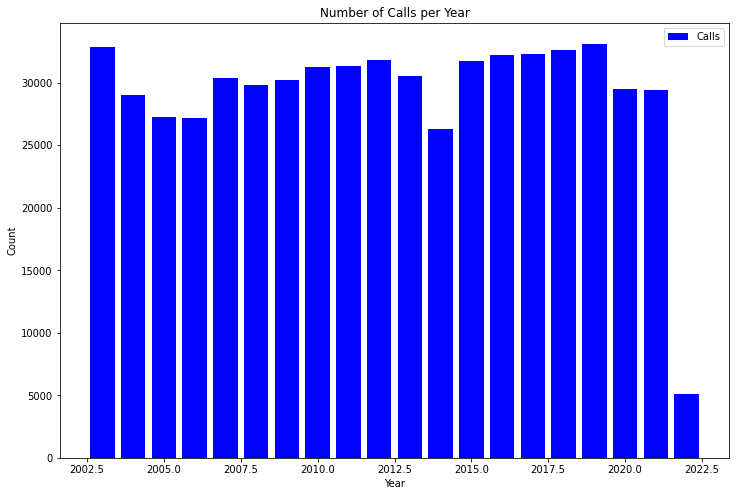

In [ ]:
#import pyplot
import matplotlib.pyplot as plt
#see incident calls per year in a visualization
calls_year_bar = firedepdf1.groupby(year('Incident Date')).count().orderBy(desc('year(Incident Date)'))

#set x axis of graphic
x = calls_year_bar.toPandas()['year(Incident Date)'].values.tolist()

#set y axis of graphic
y= calls_year_bar.toPandas()['count'].values.tolist()

#set figure size
plt.figure(figsize=(12, 8))

#define figure axis and other attributes
plt.bar(x,y, color = 'blue', label= 'Calls')

#set figure titles
plt.title("Number of Calls per Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(facecolor='white')
plt.show()

In [ ]:
#create new dataset which excludes calls made during 2022 becauase it only include beginning of year calls
firedepdf2= firedepdf1.filter(year('Incident Date') <2022)

### Data Cleansing
As part of data cleansing, at this point I'll remove duplicates and columns wich have over 60% of their datapoints as null values

In [ ]:
#remove duplicates
firedepdf2= firedepdf2.dropDuplicates()

#some basic info new dataset
firedepdf2.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578646 entries, 0 to 578645
Data columns (total 64 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Incident Number                               578646 non-null  int32         
 1   Exposure Number                               578646 non-null  int32         
 2   ID                                            578646 non-null  int32         
 3   Address                                       578342 non-null  object        
 4   Incident Date                                 578646 non-null  datetime64[ns]
 5   Call Number                                   578646 non-null  int32         
 6   Alarm DtTm                                    578646 non-null  datetime64[ns]
 7   Arrival DtTm                                  578600 non-null  datetime64[ns]
 8   Close DtTm                                    578643 n

In [ ]:
# listof columns which are to be drop
drop_list= ["Box", "Estimated Property Loss", "Estimated Contents Loss", "Area of Fire Origin", "Ignition Cause",
            "Ignition Factor Primary", "Ignition Factor Secondary", "Heat Source", "Item First Ignited", "Human Factors Associated with Ignition","Structure Type",
           "Structure Status", "Floor of Fire Origin", "Fire Spread", "No Flame Spead", "Number of floors with minimum damage",
           "Number of floors with significant damage", "Number of floors with heavy damage", "Number of floors with extreme damage",
           "Detectors Present", "Detector Type", "Detector Operation", "Detector Effectiveness", "Detector Failure Reason",
           "Automatic Extinguishing System Present", "Automatic Extinguishing Sytem Type", "Automatic Extinguishing Sytem Perfomance",
           "Automatic Extinguishing Sytem Failure Reason", "Number of Sprinkler Heads Operating", "Supervisor District"]
#drop columns containing less than 60% of data points
firedepdf2 = firedepdf2.drop(*drop_list)

#visualize cleansed dataset
display(firedepdf2.limit(30).toPandas())

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,zipcode,Battalion,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,neighborhood_district,point
0,3001394,0,30013940,1 South Van Ness Av.,2003-01-05,30050048,2003-01-05 04:11:28,2003-01-05 04:13:13,2003-01-05 04:14:16,SF,94102,B02,36,1,4,0,0,0,0,E36,0,0,0,0,1,745 - Alarm system sounded/no fire-accidental,None,86 - Investigate,-,-,-,963 - Street or road in commercial area,Mission,POINT (-122.418928 37.774844)
1,3002755,0,30027550,4150 Clement St.,2003-01-09,30090346,2003-01-09 20:23:57,2003-01-09 20:26:51,2003-01-09 20:33:53,SF,94121,B07,34,1,4,0,0,0,0,E34,0,0,0,0,1,735 - Alarm system sounded due to malfunction,None,86 - Investigate,-,-,-,331 - Hospital - medical or psychiatric,Lincoln Park,POINT (-122.504575 37.782593)
2,3002529,0,30025290,17th St. / Castro St.,2003-01-09,30090025,2003-01-09 01:53:05,2003-01-09 01:54:03,2003-01-09 01:54:03,SF,94114,B05,06,1,4,0,0,0,0,E06,0,0,0,0,1,"700 - False alarm or false call, other",None,86 - Investigate,-,-,-,963 - Street or road in commercial area,Castro/Upper Market,POINT (-122.435188 37.762671)
3,3003370,0,30033700,Columbus Av. / Filbert St.,2003-01-12,30120001,2003-01-12 00:01:28,2003-01-12 00:04:09,2003-01-12 00:04:54,SF,94133,B01,28,2,9,0,0,0,0,E28,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"960 - Street, other",Chinatown,POINT (-122.411378 37.801125)
4,3000086,0,30000860,Lombard St. / Webster St.,2003-01-01,30010109,2003-01-01 02:01:41,2003-01-01 02:05:04,2003-01-01 02:05:12,SF,94133,B04,16,2,9,0,0,0,0,T16,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"962 - Residential street, road or residential dr",Marina,POINT (-122.434407 37.800052)
5,3004883,0,30048830,Augusta St. / Charter Oak Av.,2003-01-17,30170170,2003-01-17 10:57:10,2003-01-17 11:01:53,2003-01-17 11:02:17,SF,94110,B10,42,2,9,0,0,0,0,E09,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"962 - Residential street, road or residential dr",Bayview Hunters Point,POINT (-122.404546 37.734343)
6,3006888,0,30068880,3048 16th St.,2003-01-24,30240292,2003-01-24 16:35:09,2003-01-24 16:38:46,2003-01-24 16:42:52,SF,94110,B02,07,3,9,0,0,0,0,E07,0,0,0,0,1,"714 - Central station, malicious false alarm",None,86 - Investigate,-,-,-,429 - Multifamily dwellings,Mission,POINT (-122.420501 37.76507)
7,3001533,0,30015330,153 Townsend St.,2003-01-05,30050237,2003-01-05 16:01:23,2003-01-05 16:03:47,2003-01-05 16:14:08,SF,94105,B03,08,3,11,0,0,0,0,B03,0,0,0,0,1,735 - Alarm system sounded due to malfunction,None,63 - Restore fire alarm system,-,-,-,599 - Business office,Mission Bay,POINT (-122.39166 37.779618)
8,3003400,0,30034000,702 Vallejo St.,2003-01-12,30120035,2003-01-12 02:31:47,2003-01-12 02:34:36,2003-01-12 02:51:15,SF,94104,B01,02,10,50,0,0,0,0,B01,0,0,0,0,1,"113 - Cooking fire, confined to container",None,86 - Investigate,-,-,1 - Detector alerted occupants,429 - Multifamily dwellings,Chinatown,POINT (-122.40913216 37.79870326)
9,3010461,0,30104610,99 South Van Ness Av.,2003-02-06,30370041,2003-02-06 05:09:13,2003-02-06 05:11:50,2003-02-06 05:12:15,SF,94103,B02,36,1,4,0,0,0,0,E36,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"960 - Street, other",Mission,POINT (-122.417802 37.77263)


### Data Analysis
To address the situation at hand, I’ve identified 4 incident-related focus areas where the SF Fire Department could take actions on: Seasonality, Location, Time Management, Incident Type. This structure is the one I'll follow to find answer to the hypotheses I formulated.

#### Seasonality

**Hypothesis:** The busiest days are weekends and months are those which include festivities dates (Dec, Jul, Oct)

In [ ]:
#see when most calls come basedon day of week
averagecallsday= int(((firedepdf2.count())/7))
print(f"Average calls per Week Day: {averagecallsday}")
firedepdf2.withColumn("DayOfWeek",date_format(col("Incident Date"), "EEEE")).groupby(('DayOfWeek')).count().orderBy(desc('count'))\
.show(8,truncate=False)

Average calls per Week Day: 82663
+---------+-----+
|DayOfWeek|count|
+---------+-----+
|Friday   |85598|
|Saturday |84566|
|Wednesday|82854|
|Thursday |82575|
|Tuesday  |82108|
|Monday   |80904|
|Sunday   |80041|
+---------+-----+



If I see the top 3 busiest days, one of them isn't a weekend day. Moreover, as I can see, there is no signficative different in call numbers between one of the busiest days and and average day. This tell us that "demand for fire dpeartment services (non-medical) as per day of the week is rather estable

In [ ]:
#see calls per month
averagecallsmonth= int(((firedepdf2.count())/12))
print(f"Average calls per Month of Year: {averagecallsmonth}")
firedepdf2.groupby(month('Incident Date')).count().orderBy(desc('count'))\
.show(30,truncate=False)

Average calls per Month of Year: 48220
+--------------------+-----+
|month(Incident Date)|count|
+--------------------+-----+
|1                   |52045|
|10                  |51333|
|12                  |51064|
|7                   |49810|
|9                   |48291|
|8                   |48240|
|11                  |47837|
|6                   |47463|
|3                   |46766|
|5                   |46693|
|4                   |45465|
|2                   |43639|
+--------------------+-----+



* Surprinsingly January came as busiest month. Probably explained by being one of coldest months, therefor people stay longer at home, use heating systems,etc. Dec and July or October as expected, have high number of calls. This may be explained by those celeration days which may involve people being more active and on the move, meetings involving alcohol, fireworks games, etc.

* Conclusion: looking at the average, in busiest and quietest months they tend to attend ±10% calls on average. Already a good number to evaluate how many fire fighters and equipment they'd need around those months.

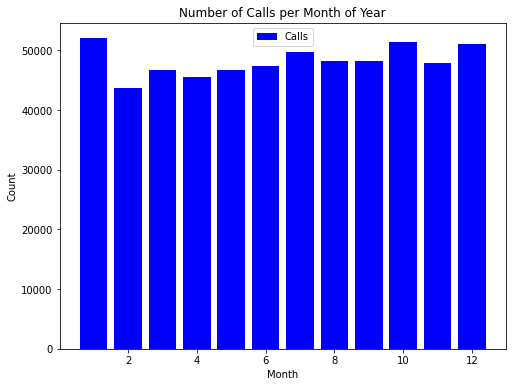

In [ ]:
#see calls per month in a graphic
calls_month1= firedepdf2.groupby(month('Incident Date')).count().orderBy(desc('count'))

#set x and y axis of graphic
xm = calls_month1.toPandas()['month(Incident Date)'].values.tolist()
ym= calls_month1.toPandas()['count'].values.tolist()

#set figure size
plt.figure(figsize=(8, 6))

#define figure axis and other attributes
plt.bar(xm,ym, color = 'blue', label= 'Calls')

#set figure titles
plt.title("Number of Calls per Month of Year")
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(facecolor='white')
plt.show()

#### Location

**Hipothesis**: San Francisco’s most dangerous areas are where most calls come from.


After doing some earch*, I found out that districts with highest crime in San Francisco are:<br>
•	Tenderloin<br>
•	Market Street/South of Market<br>
•	Mission<br>
•	Western Addition<br>
•	Bayview/Hunters Point<br>

*https://www.inside-guide-to-san-francisco-tourism.com/san-francisco-crime.html

In [ ]:
#see top 10 neighborhoods based on the number of incoming incident calls
firedepdf2.groupby(('neighborhood_district')).count().orderBy(desc('count')).show(10, truncate=False)

+------------------------------+-----+
|neighborhood_district         |count|
+------------------------------+-----+
|Tenderloin                    |51529|
|Mission                       |48447|
|Financial District/South Beach|46511|
|South of Market               |42604|
|Bayview Hunters Point         |40329|
|Western Addition              |23498|
|Sunset/Parkside               |21850|
|Nob Hill                      |19734|
|Pacific Heights               |16241|
|Castro/Upper Market           |14829|
+------------------------------+-----+
only showing top 10 rows



Results are almost as expected, nevertheless Financial District/South Beach should also be added to the list. These figures could help to do better resource management and allocation

#### Incident Type

**Hypothesis:** fires and critical emergencies (e.g. vehicle accident or citizen’s assistance) are the main reasons why fire department is contacted.

In [ ]:
#see calls by "Primary Situation", which is the incident type
firedepdf2.groupby(('Primary Situation')).count().orderBy(desc('count')).show(100, truncate=False)

+------------------------------------------------------+-----+
|Primary Situation                                     |count|
+------------------------------------------------------+-----+
|711 - Municipal alarm system, Street Box False        |53324|
|700 False alarm or false call, other                  |29755|
|700 - False alarm or false call, other                |22254|
|745 - Alarm system sounded/no fire-accidental         |19571|
|735 - Alarm system sounded due to malfunction         |15314|
|711 Municipal alarm system, malicious false alarm     |13993|
|745 Alarm system activation, no fire - unintentional  |13063|
|311 - Medical assist, assist EMS crew                 |12807|
|113 - Cooking fire, confined to container             |12046|
|500 Service Call, other                               |11981|
|735 Alarm system sounded due to malfunction           |11530|
|740 - Unintentional alarm, other                      |11155|
|743 Smoke detector activation, no fire - unintentional

See many entries repeated or with typos, will correc that to properly identify top 10 reasons of calls and then evalaute this based on neighborhood

In [ ]:
# I see some "Primary Situation" codes have typos or written in different way. Will extract only the code part to better count them
from pyspark.sql import functions
pd.options.display.max_columns = None
#additionally, will also calculate difference between Arrival DtTm and Alarm DtTm to see how quickly units arrive after being informed about emergency
format_time = "yyyy-MM-dd HH:mm:ss"
diff_time = (functions.unix_timestamp('Arrival DtTm', format_time)
            - functions.unix_timestamp('Alarm DtTm', format_time))

#add additional columns for analysis
#extract first 3 letters of string "Primary Situation" to only get the code part and therefore better quantify emergency types
firedepdf3 = firedepdf2 \
.withColumn("PrimarySituationCode", firedepdf2["Primary Situation"].substr(1,3)) \
.withColumn("TimeSpanToArrive", diff_time/60)
#look at new dataframe
display(firedepdf3.limit(30).toPandas())

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,zipcode,Battalion,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,neighborhood_district,point,PrimarySituationCode,TimeSpanToArrive
0,12115940,0,121159400,2345 24th Av.,2012-12-12,123470088,2012-12-12 08:34:42,2012-12-12 08:40:04,2012-12-12 08:42:14,SF,94116,B08,40,1,4,0,0,0,0,E40,0,0,0,0,1,553 - Public service,None,"00 - Action taken, other",-,-,-,365 - Police station,Sunset/Parkside,POINT (-122.481461 37.743734),553,5.366667
1,12115509,0,121155090,54 Mcallister St.,2012-12-10,123450401,2012-12-10 20:48:57,2012-12-10 20:56:17,2012-12-10 21:02:40,SF,94109,B03,01,1,5,0,0,0,0,T01,0,0,0,0,1,"311 - Medical assist, assist EMS crew",None,71 - Assist physically disabled,-,-,-,429 - Multifamily dwellings,Tenderloin,POINT (-122.413281 37.781047),311,7.333333
2,13000427,0,130004270,1155 BAY ST,2013-01-01,130010514,2013-01-01 19:54:33,2013-01-01 19:59:13,2013-01-01 20:01:15,SF,94123,B04,16,1,4,0,0,0,0,E16,0,0,0,0,1,"600 - Good intent call, other",None,86 - Investigate,-,-,-,"960 - Street, other",Marina,POINT (-122.42602337 37.8037425),600,4.666667
3,13000498,0,130004980,3379 22ND ST,2013-01-02,130020011,2013-01-02 01:46:15,2013-01-02 01:52:26,2013-01-02 01:53:56,SF,94110,B06,11,1,4,0,0,0,0,E11,0,0,0,0,1,154 - Dumpster/Outside trash receptacle fire,None,86 - Investigate,-,-,-,"962 - Residential street, road or residential dr",Mission,POINT (-122.42273318 37.75506591),154,6.183333
4,13001454,0,130014540,100 VAN NESS AV,2013-01-04,130040310,2013-01-04 17:21:48,2013-01-04 17:24:49,2013-01-04 17:39:56,SF,94102,B02,36,3,10,0,0,0,0,E36,0,0,0,0,1,"700 - False alarm or false call, other",None,86 - Investigate,-,-,-,599 - Business office,Tenderloin,POINT (-122.419436 37.776449),700,3.016667
5,13000304,0,130003040,19TH AV / HOLLOWAY AV,2013-01-01,130010380,2013-01-01 13:14:25,2013-01-01 13:17:15,2013-01-01 13:17:45,SF,94132,B08,19,2,9,0,0,0,0,E19,0,0,0,0,1,"715 - Local alarm sys., Malicious False alarm",None,86 - Investigate,-,-,-,"960 - Street, other",Lakeshore,POINT (-122.475222 37.721057),715,2.833333
6,13002356,0,130023560,700 80 WB BAY BR Z TI,2013-01-07,130070164,2013-01-07 11:34:51,2013-01-07 11:47:09,2013-01-07 13:50:47,SF,94130,B03,48,2,8,0,0,0,0,FB1,0,0,0,0,1,671 - Hazmat release investigation w/no hazmat,None,92 - Standby,-,-,-,"940 - Water area, other",Treasure Island,POINT (-122.375118 37.800832),671,12.300000
7,13003752,0,130037520,663 GUERRERO ST,2013-01-11,130110189,2013-01-11 13:15:03,2013-01-11 13:20:58,2013-01-11 13:25:31,SF,94110,B02,07,3,10,0,0,0,0,E06,0,0,0,0,1,"743 - Smoke detector, no fire, accidental",None,86 - Investigate,-,-,-,429 - Multifamily dwellings,Mission,POINT (-122.42339759 37.76058105),743,5.916667
8,13003938,0,130039380,1 FEDERAL ST,2013-01-12,130120015,2013-01-12 00:51:43,2013-01-12 00:57:35,2013-01-12 01:01:50,SF,94107,B03,08,1,4,0,0,0,0,E08,0,0,0,0,1,"150 - Outside rubbish fire, other",None,11 - Extinguish,-,-,-,963 - Street or road in commercial area,Financial District/South Beach,POINT (-122.39092837 37.78422227),150,5.866667
9,13001333,0,130013330,765 FULTON ST,2013-01-04,130040167,2013-01-04 11:06:08,2013-01-04 11:09:05,2013-01-04 11:20:25,SF,94117,B05,05,3,10,0,0,0,0,E05,0,0,0,0,1,"700 - False alarm or false call, other",None,86 - Investigate,-,-,-,429 - Multifamily dwellings,Hayes Valley,POINT (-122.42894375 37.77755714),700,2.950000


Let's now evaluate the top resons of calls basing our query on some of the distircts with the highest call numbers

In [ ]:
# Top reasons calls in Tenderloin
firedepdf3.filter(col("neighborhood_district") == "Tenderloin").groupBy('PrimarySituationCode').count().orderBy(desc("count")).show(10, truncate=False)

+--------------------+-----+
|PrimarySituationCode|count|
+--------------------+-----+
|711                 |8799 |
|700                 |5119 |
|745                 |3470 |
|735                 |2324 |
|113                 |2292 |
|743                 |2127 |
|554                 |2009 |
|733                 |1950 |
|353                 |1819 |
|311                 |1655 |
+--------------------+-----+
only showing top 10 rows



Top 5 reasons Tenderloin calls:
* 711 = Municipal alarm system (false alarm)
* 700 = False alarm or false call
* 745 = Alarm system sounded/no fire , accidental alarm (false alarm)
* 735 = Alarm system sounded due to malfunction (false alarm)
* 113 = Cooking fire, confined to container

In [ ]:
# Top reasons calls in Mission
firedepdf3.filter(col("neighborhood_district") == "Mission").groupBy('PrimarySituationCode').count().orderBy(desc("count")).show(10, truncate=False)

+--------------------+-----+
|PrimarySituationCode|count|
+--------------------+-----+
|711                 |8493 |
|700                 |3462 |
|745                 |2041 |
|322                 |2036 |
|735                 |1914 |
|311                 |1856 |
|500                 |1600 |
|151                 |1490 |
|323                 |1360 |
|113                 |1226 |
+--------------------+-----+
only showing top 10 rows



Top 5 reasons Mission calls:
* 711 = Municipal alarm system (false alarm)
* 700 = False alarm or false call
* 745 = Alarm system sounded/no fire , accidental alarm (false alarm)
* 322 = Motor vehicle accident with injuries
* 735 = Alarm system sounded due to malfunction (false alarm)

In [ ]:
# Top reasons calls in Financial District/South Beach
firedepdf3.filter(col("neighborhood_district") == "Financial District/South Beach").groupBy('PrimarySituationCode').count().orderBy(desc("count")).show(10, truncate=False)

+--------------------+-----+
|PrimarySituationCode|count|
+--------------------+-----+
|700                 |5972 |
|711                 |5783 |
|745                 |5006 |
|735                 |2623 |
|740                 |2454 |
|743                 |1568 |
|733                 |1342 |
|353                 |1314 |
|322                 |1186 |
|500                 |1147 |
+--------------------+-----+
only showing top 10 rows



Top 5 reasons Financial District/South Beach calls:
* 700 = False alarm or false call
* 711 = Municipal alarm system (false alarm)
* 745 = Alarm system sounded/no fire , accidental alarm (false alarm)
* 735 = Alarm system sounded due to malfunction (false alarm)
* 740 = Unintentional alarm (false alarm)

As the hypothesis suggested, I expected the top reasons of calls being related to fire or critical emergencies, but this is not the case. Surprinsingly, most of the calls are related to False Alarms.
This could help fire departments to evaluate how many resources they spend on attendig these calls and even better formulate a procedure to handle those false alarms calls in a way that it does not allocate muc resources on them.


#### Time Management

Minutes or even seconds can make adifference between death and life. Since fire departments are understaffed, SF Fire departments would benefit by sharing best practices around time management and route optimization of their fastest units.


In [ ]:
#see unit which arrived the fastest more often
firedepdf3.groupby(('First Unit On Scene')).count().orderBy(desc('count')).show(20, truncate=False)

+-------------------+------+
|First Unit On Scene|count |
+-------------------+------+
|null               |248826|
|E03                |16716 |
|E01                |15910 |
|E36                |12153 |
|E13                |9914  |
|E07                |9240  |
|T03                |8306  |
|E05                |7962  |
|E06                |7635  |
|E08                |7322  |
|E41                |7319  |
|AP                 |7192  |
|T01                |7047  |
|E17                |6662  |
|E21                |6586  |
|E28                |6577  |
|E16                |6217  |
|E38                |5772  |
|E43                |5574  |
|E10                |5441  |
+-------------------+------+
only showing top 20 rows



In [ ]:
#see fastest units to arrive based on average time to arrive
firedepdf3.groupBy('First Unit On Scene').agg(functions.count('First Unit On Scene'), functions.mean('TimeSpanToArrive')).orderBy(asc('avg(TimeSpanToArrive)')).show(20, truncate=False)

+-------------------+--------------------------+---------------------+
|First Unit On Scene|count(First Unit On Scene)|avg(TimeSpanToArrive)|
+-------------------+--------------------------+---------------------+
|OES248             |1                         |0.0                  |
|CD1                |2                         |0.375                |
|TCA11              |1                         |1.4666666666666666   |
|FB2                |1                         |1.5                  |
|E2                 |1                         |1.65                 |
|CD2                |7                         |1.7285714285714289   |
|OES                |1                         |2.0166666666666666   |
|MA1                |4                         |2.9208333333333334   |
|M35                |1                         |3.1666666666666665   |
|SO1                |9                         |3.27037037037037     |
|D2                 |363                       |3.352249770431589    |
|B05  

In [ ]:
#see units which arrived more often the fastest to incidents and their respective average time
firedepdf3.groupBy('First Unit On Scene').agg(functions.count('First Unit On Scene'), functions.mean('TimeSpanToArrive')).orderBy(desc('count(First Unit On Scene)')).show(20, truncate=False)

+-------------------+--------------------------+---------------------+
|First Unit On Scene|count(First Unit On Scene)|avg(TimeSpanToArrive)|
+-------------------+--------------------------+---------------------+
|E03                |16716                     |4.167957844779451    |
|E01                |15910                     |4.615966897129689    |
|E36                |12153                     |4.324947200965466    |
|E13                |9914                      |4.387001546634392    |
|E07                |9240                      |4.24183621933622     |
|T03                |8306                      |4.678106188297618    |
|E05                |7962                      |3.964627815456752    |
|E06                |7635                      |4.579635450774942    |
|E08                |7322                      |5.105729308931985    |
|E41                |7319                      |4.477430887644032    |
|AP                 |7192                      |13.290387467556537   |
|T01  

* E03 unit coul share best practices with other units around how it makes or procedures it follows to be so responsive with such high frequency
* on the other hand, if only focusing on the speed (and not arrival frequency), units such as E05 or D2 could share their practices that make them arrive to incident location with remarkable fast times (below 4 minutes).
* Additional investigation may be needed to know why units such as AP have such a high average time to arrive. Reasons could be difficult route, distance to incident locations, etc. This first statistics are however a good starting point for data driven decision making

#### Resource Allocation based on District and Incident Type (part of Incident Type Hypothesis)

I also believe it is important to evaluate and quantify what type of key or critical emergencies occur more often in some districts. For this analysis I'll take emergencies type such as
* 311: medical asssistance needed
* 322: motor vehicle accident with injury
* 111 and 113: fire related

The idea of having this details at hand is for SF fire department to do better resource management & allocation because if a specific district has a high number of fire related incidents, then it would make sense for them to be better equipped for those situations in comparison to other districts which may have underused assets. This latter could share or lend some of their underused assets to other departments

In [ ]:
# primary situation code 311 - medical assist by neighborhoods with highest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '311').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(desc('count(neighborhood_district)')).show(10, truncate=False)

# primary situation code 311 - medical assist by neighborhoods with lowest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '311').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(asc('count(neighborhood_district)')).show(10, truncate=False)

+------------------------------+----------------------------+
|neighborhood_district         |count(neighborhood_district)|
+------------------------------+----------------------------+
|Mission                       |1856                        |
|Tenderloin                    |1655                        |
|South of Market               |1291                        |
|Bayview Hunters Point         |1257                        |
|Sunset/Parkside               |1081                        |
|Financial District/South Beach|857                         |
|Western Addition              |672                         |
|Outer Richmond                |548                         |
|West of Twin Peaks            |543                         |
|Hayes Valley                  |526                         |
+------------------------------+----------------------------+
only showing top 10 rows

+---------------------+----------------------------+
|neighborhood_district|count(neighborhood_district)|


In [ ]:
# primary situation code 322 Motor vehicle accident with injuries by neighborhoods with highest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '322').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(desc('count(neighborhood_district)')).show(10, truncate=False)

# primary situation code 322 - Motor vehicle accident with injuries by neighborhoods with lowest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '322').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(asc('count(neighborhood_district)')).show(10, truncate=False)

+------------------------------+----------------------------+
|neighborhood_district         |count(neighborhood_district)|
+------------------------------+----------------------------+
|Mission                       |2036                        |
|South of Market               |1501                        |
|Bayview Hunters Point         |1385                        |
|Financial District/South Beach|1186                        |
|Western Addition              |926                         |
|Sunset/Parkside               |910                         |
|Outer Mission                 |806                         |
|Hayes Valley                  |720                         |
|Tenderloin                    |697                         |
|Bernal Heights                |630                         |
+------------------------------+----------------------------+
only showing top 10 rows

+---------------------+----------------------------+
|neighborhood_district|count(neighborhood_district)|


In [ ]:
# primary situation code 113 - Cooking fire confined to container  by neighborhoods with highest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '113').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(desc('count(neighborhood_district)')).show(10, truncate=False)

# primary situation code 113 - Cooking fire confined to container by neighborhoods with lowest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '113').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(asc('count(neighborhood_district)')).show(10, truncate=False)

+------------------------------+----------------------------+
|neighborhood_district         |count(neighborhood_district)|
+------------------------------+----------------------------+
|Tenderloin                    |2292                        |
|Western Addition              |1741                        |
|South of Market               |1361                        |
|Mission                       |1226                        |
|Nob Hill                      |876                         |
|Financial District/South Beach|781                         |
|Pacific Heights               |708                         |
|Chinatown                     |626                         |
|Sunset/Parkside               |612                         |
|Lakeshore                     |580                         |
+------------------------------+----------------------------+
only showing top 10 rows

+---------------------+----------------------------+
|neighborhood_district|count(neighborhood_district)|


In [ ]:
# primary situation code 111 - building fire by neighborhoods with highest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '111').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(desc('count(neighborhood_district)')).show(10, truncate=False)

# primary situation code 111 - building fire by neighborhoods with lowest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '111').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(asc('count(neighborhood_district)')).show(10, truncate=False)

+------------------------------+----------------------------+
|neighborhood_district         |count(neighborhood_district)|
+------------------------------+----------------------------+
|Mission                       |720                         |
|Tenderloin                    |689                         |
|Bayview Hunters Point         |547                         |
|South of Market               |447                         |
|Sunset/Parkside               |323                         |
|Nob Hill                      |253                         |
|Western Addition              |245                         |
|Financial District/South Beach|239                         |
|Castro/Upper Market           |234                         |
|Hayes Valley                  |230                         |
+------------------------------+----------------------------+
only showing top 10 rows

+---------------------+----------------------------+
|neighborhood_district|count(neighborhood_district)|


In [ ]:
# primary situation code 412 - gas leak by neighborhoods with highest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '412').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(desc('count(neighborhood_district)')).show(10, truncate=False)

# primary situation code 412 - gas leak by neighborhoods with lowest occurrence
firedepdf3.filter(col('PrimarySituationCode') == '412').groupBy('neighborhood_district').agg(functions.count('neighborhood_district')).orderBy(asc('count(neighborhood_district)')).show(10, truncate=False)

+---------------------+----------------------------+
|neighborhood_district|count(neighborhood_district)|
+---------------------+----------------------------+
|Bayview Hunters Point|462                         |
|Mission              |354                         |
|Sunset/Parkside      |205                         |
|Tenderloin           |169                         |
|Outer Richmond       |169                         |
|Western Addition     |165                         |
|Castro/Upper Market  |164                         |
|West of Twin Peaks   |159                         |
|Haight Ashbury       |156                         |
|Marina               |154                         |
+---------------------+----------------------------+
only showing top 10 rows

+---------------------+----------------------------+
|neighborhood_district|count(neighborhood_district)|
+---------------------+----------------------------+
|Seacliff             |13                          |
|McLaren Park       

As initially mentioned, the displayed statistics would help to better allocate resources or even share underused assets with those departments which do make use of assets more often. For example, if taking a look at the last chart, Bayview Hunters Point attends the most Gas Leak related incidents, whereas Portola or Mission Bay do not. If special equipment or personnel is required for such type of emergencies, resources from one district's fire department could be transferred/lend to the other.

### Machine Learning Training

The idea of applying ML in this contetx is to predict whether an incident call may be related to false alarms, since apparently SF Fire Department invests lots of deal of time and resources in it as most calls receive by department are related to this.
The idea is that the model will make a prediction before the first unit arrives to the incident, so that officers are more attentive when sending resources to a call which may be likely a false alarm call type.

To prepare the dataset for ML training, some of the steps I'll follow are:
* columns in right format
* data engineering
* one hot encoding
* dataset training and test split
* model training (various classifiers)
* evaluation metrics

##### Data Pre Processing

Here I'll delete columns which do not bring much to the analysis as they are fields that are filled in once the first unit arrived to the incident location.

In [ ]:
display(firedepdf3.limit(30).toPandas())

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,zipcode,Battalion,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,neighborhood_district,point,PrimarySituationCode,ActionTakenPrimaryCode,PropertyUseCode,TimeSpanToArrive
0,3001394,0,30013940,1 South Van Ness Av.,2003-01-05,30050048,2003-01-05 04:11:28,2003-01-05 04:13:13,2003-01-05 04:14:16,SF,94102,B02,36,1,4,0,0,0,0,E36,0,0,0,0,1,745 - Alarm system sounded/no fire-accidental,None,86 - Investigate,-,-,-,963 - Street or road in commercial area,Mission,POINT (-122.418928 37.774844),745,86,963,1.750000
1,3002755,0,30027550,4150 Clement St.,2003-01-09,30090346,2003-01-09 20:23:57,2003-01-09 20:26:51,2003-01-09 20:33:53,SF,94121,B07,34,1,4,0,0,0,0,E34,0,0,0,0,1,735 - Alarm system sounded due to malfunction,None,86 - Investigate,-,-,-,331 - Hospital - medical or psychiatric,Lincoln Park,POINT (-122.504575 37.782593),735,86,331,2.900000
2,3002529,0,30025290,17th St. / Castro St.,2003-01-09,30090025,2003-01-09 01:53:05,2003-01-09 01:54:03,2003-01-09 01:54:03,SF,94114,B05,06,1,4,0,0,0,0,E06,0,0,0,0,1,"700 - False alarm or false call, other",None,86 - Investigate,-,-,-,963 - Street or road in commercial area,Castro/Upper Market,POINT (-122.435188 37.762671),700,86,963,0.966667
3,3003370,0,30033700,Columbus Av. / Filbert St.,2003-01-12,30120001,2003-01-12 00:01:28,2003-01-12 00:04:09,2003-01-12 00:04:54,SF,94133,B01,28,2,9,0,0,0,0,E28,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"960 - Street, other",Chinatown,POINT (-122.411378 37.801125),711,86,960,2.683333
4,3000086,0,30000860,Lombard St. / Webster St.,2003-01-01,30010109,2003-01-01 02:01:41,2003-01-01 02:05:04,2003-01-01 02:05:12,SF,94133,B04,16,2,9,0,0,0,0,T16,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"962 - Residential street, road or residential dr",Marina,POINT (-122.434407 37.800052),711,86,962,3.383333
5,3004883,0,30048830,Augusta St. / Charter Oak Av.,2003-01-17,30170170,2003-01-17 10:57:10,2003-01-17 11:01:53,2003-01-17 11:02:17,SF,94110,B10,42,2,9,0,0,0,0,E09,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"962 - Residential street, road or residential dr",Bayview Hunters Point,POINT (-122.404546 37.734343),711,86,962,4.716667
6,3006888,0,30068880,3048 16th St.,2003-01-24,30240292,2003-01-24 16:35:09,2003-01-24 16:38:46,2003-01-24 16:42:52,SF,94110,B02,07,3,9,0,0,0,0,E07,0,0,0,0,1,"714 - Central station, malicious false alarm",None,86 - Investigate,-,-,-,429 - Multifamily dwellings,Mission,POINT (-122.420501 37.76507),714,86,429,3.616667
7,3001533,0,30015330,153 Townsend St.,2003-01-05,30050237,2003-01-05 16:01:23,2003-01-05 16:03:47,2003-01-05 16:14:08,SF,94105,B03,08,3,11,0,0,0,0,B03,0,0,0,0,1,735 - Alarm system sounded due to malfunction,None,63 - Restore fire alarm system,-,-,-,599 - Business office,Mission Bay,POINT (-122.39166 37.779618),735,63,599,2.400000
8,3003400,0,30034000,702 Vallejo St.,2003-01-12,30120035,2003-01-12 02:31:47,2003-01-12 02:34:36,2003-01-12 02:51:15,SF,94104,B01,02,10,50,0,0,0,0,B01,0,0,0,0,1,"113 - Cooking fire, confined to container",None,86 - Investigate,-,-,1 - Detector alerted occupants,429 - Multifamily dwellings,Chinatown,POINT (-122.40913216 37.79870326),113,86,429,2.816667
9,3010461,0,30104610,99 South Van Ness Av.,2003-02-06,30370041,2003-02-06 05:09:13,2003-02-06 05:11:50,2003-02-06 05:12:15,SF,94103,B02,36,1,4,0,0,0,0,E36,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,-,-,-,"960 - Street, other",Mission,POINT (-122.417802 37.77263),711,86,960,2.616667


I'm going to check as well those variables which have large null, - or no values at all for the analysis

In [ ]:
firedepdf3.groupBy('Action Taken Secondary').agg(functions.count('Action Taken Secondary')).orderBy(desc('count(Action Taken Secondary)')).show()

+----------------------+-----------------------------+
|Action Taken Secondary|count(Action Taken Secondary)|
+----------------------+-----------------------------+
|                     -|                       314722|
|      86 - Investigate|                        13837|
|  63 Restore fire a...|                         6878|
|        86 Investigate|                         3766|
|  12 - Salvage & ov...|                         2189|
|  34 - Transport pe...|                          778|
|  63 - Restore fire...|                          745|
|  12 Salvage & over...|                          602|
|   34 Transport person|                          601|
|   64 Shut down system|                          552|
|        51 - Ventilate|                          533|
|  82 Notify other a...|                          515|
|  84 Refer to prope...|                          430|
|          51 Ventilate|                          410|
|          92 - Standby|                          310|
|  82 - No

In [ ]:
firedepdf3.groupBy('Action Taken Other').agg(functions.count('Action Taken Other')).orderBy(desc('count(Action Taken Other)')).show()

+--------------------+-------------------------+
|  Action Taken Other|count(Action Taken Other)|
+--------------------+-------------------------+
|                   -|                   332844|
|    86 - Investigate|                     1971|
|      86 Investigate|                      293|
|63 Restore fire a...|                      233|
|      51 - Ventilate|                      178|
|82 Notify other a...|                      160|
| 34 Transport person|                      150|
|34 - Transport pe...|                      146|
|84 Refer to prope...|                      142|
|63 - Restore fire...|                      109|
|81 - Incident com...|                      108|
| 52 - Forcible entry|                      106|
|82 - Notify other...|                      103|
|        51 Ventilate|                       95|
|12 Salvage & over...|                       78|
|   66 - Remove water|                       75|
|00 Action taken, ...|                       54|
|84 - Refer to pro..

In [ ]:
firedepdf3.groupBy('Detector Alerted Occupants').agg(functions.count('Detector Alerted Occupants')).orderBy(desc('count(Detector Alerted Occupants)')).show()

+--------------------------+---------------------------------+
|Detector Alerted Occupants|count(Detector Alerted Occupants)|
+--------------------------+---------------------------------+
|                         -|                           313264|
|      1 - Detector aler...|                            11599|
|               U - Unknown|                             8521|
|      1 Detector alerte...|                             6107|
|      2 - Detector did ...|                             2813|
|                 U Unknown|                             1956|
|      2 Detector did no...|                              601|
|                      null|                                0|
+--------------------------+---------------------------------+



In [ ]:
# drop not useful columns
columns2drop= ["Incident Number", "ID", "Call Number", "City", "Action Taken Secondary", "Action Taken Other", "Detector Alerted Occupants"]
firedepdf4 = firedepdf3.drop(*columns2drop)
display(firedepdf4.limit(30).toPandas())

,Exposure Number,Address,Incident Date,Alarm DtTm,Arrival DtTm,Close DtTm,zipcode,Battalion,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Property Use,neighborhood_district,point,PrimarySituationCode,ActionTakenPrimaryCode,PropertyUseCode,TimeSpanToArrive
0,0,1 South Van Ness Av.,2003-01-05,2003-01-05 04:11:28,2003-01-05 04:13:13,2003-01-05 04:14:16,94102,B02,36,1,4,0,0,0,0,E36,0,0,0,0,1,745 - Alarm system sounded/no fire-accidental,None,86 - Investigate,963 - Street or road in commercial area,Mission,POINT (-122.418928 37.774844),745,86,963,1.750000
1,0,4150 Clement St.,2003-01-09,2003-01-09 20:23:57,2003-01-09 20:26:51,2003-01-09 20:33:53,94121,B07,34,1,4,0,0,0,0,E34,0,0,0,0,1,735 - Alarm system sounded due to malfunction,None,86 - Investigate,331 - Hospital - medical or psychiatric,Lincoln Park,POINT (-122.504575 37.782593),735,86,331,2.900000
2,0,17th St. / Castro St.,2003-01-09,2003-01-09 01:53:05,2003-01-09 01:54:03,2003-01-09 01:54:03,94114,B05,06,1,4,0,0,0,0,E06,0,0,0,0,1,"700 - False alarm or false call, other",None,86 - Investigate,963 - Street or road in commercial area,Castro/Upper Market,POINT (-122.435188 37.762671),700,86,963,0.966667
3,0,Columbus Av. / Filbert St.,2003-01-12,2003-01-12 00:01:28,2003-01-12 00:04:09,2003-01-12 00:04:54,94133,B01,28,2,9,0,0,0,0,E28,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,"960 - Street, other",Chinatown,POINT (-122.411378 37.801125),711,86,960,2.683333
4,0,Lombard St. / Webster St.,2003-01-01,2003-01-01 02:01:41,2003-01-01 02:05:04,2003-01-01 02:05:12,94133,B04,16,2,9,0,0,0,0,T16,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,"962 - Residential street, road or residential dr",Marina,POINT (-122.434407 37.800052),711,86,962,3.383333
5,0,Augusta St. / Charter Oak Av.,2003-01-17,2003-01-17 10:57:10,2003-01-17 11:01:53,2003-01-17 11:02:17,94110,B10,42,2,9,0,0,0,0,E09,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,"962 - Residential street, road or residential dr",Bayview Hunters Point,POINT (-122.404546 37.734343),711,86,962,4.716667
6,0,3048 16th St.,2003-01-24,2003-01-24 16:35:09,2003-01-24 16:38:46,2003-01-24 16:42:52,94110,B02,07,3,9,0,0,0,0,E07,0,0,0,0,1,"714 - Central station, malicious false alarm",None,86 - Investigate,429 - Multifamily dwellings,Mission,POINT (-122.420501 37.76507),714,86,429,3.616667
7,0,153 Townsend St.,2003-01-05,2003-01-05 16:01:23,2003-01-05 16:03:47,2003-01-05 16:14:08,94105,B03,08,3,11,0,0,0,0,B03,0,0,0,0,1,735 - Alarm system sounded due to malfunction,None,63 - Restore fire alarm system,599 - Business office,Mission Bay,POINT (-122.39166 37.779618),735,63,599,2.400000
8,0,702 Vallejo St.,2003-01-12,2003-01-12 02:31:47,2003-01-12 02:34:36,2003-01-12 02:51:15,94104,B01,02,10,50,0,0,0,0,B01,0,0,0,0,1,"113 - Cooking fire, confined to container",None,86 - Investigate,429 - Multifamily dwellings,Chinatown,POINT (-122.40913216 37.79870326),113,86,429,2.816667
9,0,99 South Van Ness Av.,2003-02-06,2003-02-06 05:09:13,2003-02-06 05:11:50,2003-02-06 05:12:15,94103,B02,36,1,4,0,0,0,0,E36,0,0,0,0,1,"711 - Municipal alarm system, Street Box False",None,86 - Investigate,"960 - Street, other",Mission,POINT (-122.417802 37.77263),711,86,960,2.616667


Additional data manipulation:
* Address & Incident Date delete (convert to day and month)
* Extractalarm time
* delete fields won't be useful because they are filled one the first unit arrives to location: 1st unit on scene, fatalities and injuries, action taken primary, etc

In [ ]:
columns2drop1 = ["Address", "Incident Date", "Alarm DtTm", "Arrival DtTm", "Close DtTm", "First Unit On Scene",
                "Fire Fatalities", "Fire Injuries", "Civilian Fatalities", "Civilian Injuries",
                "Action Taken Primary", "Primary Situation", "Mutual Aid", "Property Use", "ActionTakenPrimaryCode",
                "TimeSpanToArrive"]

firedepdf5 = firedepdf4 \
.withColumn("DayAlarm", date_format(col("Alarm DtTm"), "EEEE")) \
.withColumn("MonthAlarm", date_format(col("Alarm DtTm"), "M")) \
.withColumn("TimeAlarm", date_format(col("Alarm DtTm"), "H")) \
.drop(*columns2drop1)

display(firedepdf5.limit(30).toPandas())


,Exposure Number,zipcode,Battalion,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Number of Alarms,neighborhood_district,point,PrimarySituationCode,PropertyUseCode,DayAlarm,MonthAlarm,TimeAlarm
0,0,94116,B08,40,1,4,0,0,0,0,1,Sunset/Parkside,POINT (-122.481461 37.743734),553,365,Wednesday,12,8
1,0,94109,B03,01,1,5,0,0,0,0,1,Tenderloin,POINT (-122.413281 37.781047),311,429,Monday,12,20
2,0,94123,B04,16,1,4,0,0,0,0,1,Marina,POINT (-122.42602337 37.8037425),600,960,Tuesday,1,19
3,0,94110,B06,11,1,4,0,0,0,0,1,Mission,POINT (-122.42273318 37.75506591),154,962,Wednesday,1,1
4,0,94102,B02,36,3,10,0,0,0,0,1,Tenderloin,POINT (-122.419436 37.776449),700,599,Friday,1,17
5,0,94132,B08,19,2,9,0,0,0,0,1,Lakeshore,POINT (-122.475222 37.721057),715,960,Tuesday,1,13
6,0,94130,B03,48,2,8,0,0,0,0,1,Treasure Island,POINT (-122.375118 37.800832),671,940,Monday,1,11
7,0,94110,B02,07,3,10,0,0,0,0,1,Mission,POINT (-122.42339759 37.76058105),743,429,Friday,1,13
8,0,94107,B03,08,1,4,0,0,0,0,1,Financial District/South Beach,POINT (-122.39092837 37.78422227),150,963,Saturday,1,0
9,0,94117,B05,05,3,10,0,0,0,0,1,Hayes Valley,POINT (-122.42894375 37.77755714),700,429,Friday,1,11


I noticed that false alarms calls code start with 7, so for the training, I'll have a classifier which will categorize calls into 2 group: 7-type calls and rest of calls.

In [ ]:
firedepdf6 = firedepdf5 \
.withColumn("PrimarySituationSingleCode", firedepdf5["PrimarySituationCode"].substr(1,1)) \
.drop("PrimarySituationCode")

display(firedepdf6.limit(30).toPandas())

,Exposure Number,zipcode,Battalion,Station Area,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Number of Alarms,neighborhood_district,point,PropertyUseCode,DayAlarm,MonthAlarm,TimeAlarm,PrimarySituationSingleCode
0,0,94116,B08,40,1,4,0,0,0,0,1,Sunset/Parkside,POINT (-122.481461 37.743734),365,Wednesday,12,8,5
1,0,94109,B03,01,1,5,0,0,0,0,1,Tenderloin,POINT (-122.413281 37.781047),429,Monday,12,20,3
2,0,94123,B04,16,1,4,0,0,0,0,1,Marina,POINT (-122.42602337 37.8037425),960,Tuesday,1,19,6
3,0,94110,B06,11,1,4,0,0,0,0,1,Mission,POINT (-122.42273318 37.75506591),962,Wednesday,1,1,1
4,0,94102,B02,36,3,10,0,0,0,0,1,Tenderloin,POINT (-122.419436 37.776449),599,Friday,1,17,7
5,0,94132,B08,19,2,9,0,0,0,0,1,Lakeshore,POINT (-122.475222 37.721057),960,Tuesday,1,13,7
6,0,94130,B03,48,2,8,0,0,0,0,1,Treasure Island,POINT (-122.375118 37.800832),940,Monday,1,11,6
7,0,94110,B02,07,3,10,0,0,0,0,1,Mission,POINT (-122.42339759 37.76058105),429,Friday,1,13,7
8,0,94107,B03,08,1,4,0,0,0,0,1,Financial District/South Beach,POINT (-122.39092837 37.78422227),963,Saturday,1,0,1
9,0,94117,B05,05,3,10,0,0,0,0,1,Hayes Valley,POINT (-122.42894375 37.77755714),429,Friday,1,11,7


In [ ]:
#one hot encoding some variables so that they all remain as numbers
from pyspark.ml.feature import OneHotEncoder
